In [22]:
%load_ext autoreload
%autoreload 2
%aimport -sympy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# %reload_ext

In [24]:
from planttraits.datasets.plant_traits_dataset import PlantTraitsDataset
from planttraits.models.example_model import PTNN, kwargs
from torch.utils.data import DataLoader
import pytorch_lightning as pl
import torch 
import matplotlib.pyplot as plt

In [25]:
train_dataset = PlantTraitsDataset()
test_dataset = PlantTraitsDataset(preprocessors=train_dataset.return_preprocessors())

KeyError: "['WORLDCLIM_BIO7_temperature_annual_range'] not in index"

### Modis_vod

In [ ]:
preps = train_dataset.return_preprocessors()
modis_prep = preps['modis_vod']
cols = modis_prep.columns
train_modis = train_dataset.data[cols]
display(train_modis.head())

,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m12,...,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m3,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m4,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m5,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m6,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m7,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m8,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m9,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m12
id,,,,,,,,,,,,,,,,,,,,,
192027691,-2.392118,-0.352168,-2.989625,-2.857319,0.170875,-2.695664,-2.847051,-0.256929,-2.651203,-2.728472,...,-0.837725,-0.627481,-0.386647,-0.065305,0.083761,0.164635,0.018840,-0.203118,-0.567328,-0.698219
195542235,-2.392118,-0.152175,-3.387043,-2.857319,1.019963,-3.351885,-2.847051,0.370064,-3.383009,-2.728472,...,0.085720,0.461491,0.792986,1.049020,1.111878,1.030528,0.992753,0.736907,0.227936,-0.217895
196639184,0.523742,-0.167047,1.315906,2.443365,-0.533264,1.625095,1.874911,-0.312877,1.453806,1.069182,...,-0.179050,-0.186352,-0.191429,-0.191015,-0.206432,-0.281474,-0.209390,-0.262866,-0.196136,-0.138017
195728812,0.514175,-0.712637,0.986286,0.940010,-0.378139,1.112273,0.924946,-0.529633,1.122703,0.669023,...,-0.667141,-0.744201,-0.764907,-0.686107,-0.501946,-0.325988,-0.250858,-0.218667,-0.370415,-0.516856
195251545,0.538463,1.751732,-0.513519,-1.494045,0.721331,-1.317672,0.231428,2.199499,-1.098974,0.567622,...,1.871368,1.664968,-0.190072,-0.807363,-0.871454,-0.808960,-0.461890,0.256419,1.664704,1.655546


In [ ]:
print(train_modis.columns.tolist())

['MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m10', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m11', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m11', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m12', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m12', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m12', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m2', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m

In [ ]:
test_col = f"MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m10"

if test_col in train_modis.columns:
    print("Istnieje")
else:
    print("Nie istnieje")


Istnieje


### Soil

In [ ]:
preps = train_dataset.return_preprocessors()
soil_prep = preps['soil']
cols = soil_prep.columns

In [ ]:
cols

['SOIL_bdod_0.5cm_mean_0.01_deg',
 'SOIL_bdod_100.200cm_mean_0.01_deg',
 'SOIL_bdod_15.30cm_mean_0.01_deg',
 'SOIL_bdod_30.60cm_mean_0.01_deg',
 'SOIL_bdod_5.15cm_mean_0.01_deg',
 'SOIL_bdod_60.100cm_mean_0.01_deg',
 'SOIL_cec_0.5cm_mean_0.01_deg',
 'SOIL_cec_100.200cm_mean_0.01_deg',
 'SOIL_cec_15.30cm_mean_0.01_deg',
 'SOIL_cec_30.60cm_mean_0.01_deg',
 'SOIL_cec_5.15cm_mean_0.01_deg',
 'SOIL_cec_60.100cm_mean_0.01_deg',
 'SOIL_cfvo_0.5cm_mean_0.01_deg',
 'SOIL_cfvo_100.200cm_mean_0.01_deg',
 'SOIL_cfvo_15.30cm_mean_0.01_deg',
 'SOIL_cfvo_30.60cm_mean_0.01_deg',
 'SOIL_cfvo_5.15cm_mean_0.01_deg',
 'SOIL_cfvo_60.100cm_mean_0.01_deg',
 'SOIL_clay_0.5cm_mean_0.01_deg',
 'SOIL_clay_100.200cm_mean_0.01_deg',
 'SOIL_clay_15.30cm_mean_0.01_deg',
 'SOIL_clay_30.60cm_mean_0.01_deg',
 'SOIL_clay_5.15cm_mean_0.01_deg',
 'SOIL_clay_60.100cm_mean_0.01_deg',
 'SOIL_nitrogen_0.5cm_mean_0.01_deg',
 'SOIL_nitrogen_100.200cm_mean_0.01_deg',
 'SOIL_nitrogen_15.30cm_mean_0.01_deg',
 'SOIL_nitrogen_30.60c

In [ ]:
len(cols)

61

In [ ]:
train_img = train_dataset.img_preprocessor.transform(r"C:\Users\julia\VSCode\plant-traits-2024\data\train_images\26375.jpeg")
train_img.shape

torch.Size([3, 512, 512])

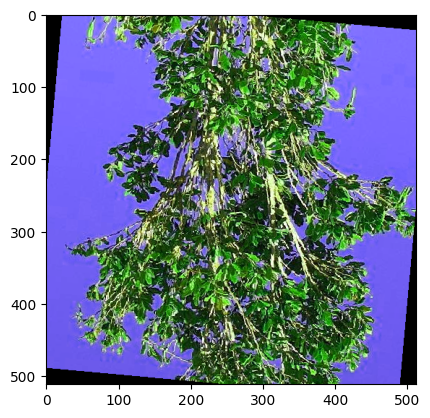

In [ ]:
plt.imshow(train_img.numpy().transpose(1, 2, 0))

In [ ]:
len(train_dataset)

55327

In [ ]:
len(test_dataset)

6545

In [ ]:
train_loader = DataLoader(train_dataset)
test_loader = DataLoader(test_dataset)

In [ ]:
img, modisvod_row, soil_row, worldclimbio_row, std_row, mean_row = next(iter(train_loader))

KeyError: 'img'

In [13]:
soil_row

tensor([[ 0.2917,  0.3684,  0.3333,  0.4211,  0.3913,  0.4000,  0.0000,  0.4366,
          0.3766,  0.3562,  0.2561,  0.5139, -0.0267, -0.0194, -0.0225,  0.0825,
          0.0235,  0.0680, -0.0089, -0.6066, -0.3364, -0.3252, -0.0741, -0.4274,
         -0.3661, -0.1807, -0.4640, -0.2959, -0.3920, -0.1481, -0.6810, -0.3421,
         -0.5752, -0.4588, -0.7092, -0.3333, -0.6786,  0.4286,  0.5625,  0.4667,
          0.5333,  0.4286,  0.5333, -0.1891,  0.0251, -0.1396, -0.1196, -0.1709,
         -0.0591,  0.3989,  0.5096,  0.4857,  0.4566,  0.3933,  0.4578, -0.4051,
         -0.2857, -0.4111, -0.2676, -0.3404, -0.4419]])

In [14]:
std_row, mean_row

(tensor([[0., 0., 0., 0., 0., 0.]]),
 tensor([[0.4018, 2.5462, 0.1111, 0.8082, 1.0471, 3.9361]]))

In [17]:
model = PTNN(**kwargs)
trainer = pl.Trainer()

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [14]:
preds = trainer.predict(model, test_loader)

You are using a CUDA device ('NVIDIA GeForce RTX 4050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x56 and 163x256)

In [ ]:
preds = torch.concat(preds)

NameError: name 'preds' is not defined

In [ ]:
test_dataset.transform_predictions(preds)

NameError: name 'preds' is not defined